In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import json
import gmaps
import datetime
#from datetime import month

In [3]:
review_summary = pd.read_csv('../Dataset/reviews_summary.csv')

In [43]:
review_summary.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
year                      int64
month                    object
day                       int64
dtype: object

In [32]:
def mapper(month):
    date = datetime.datetime(2000,month,1)
    return date.strftime('%b')
    

In [7]:
review_summary['date'] = pd.to_datetime(review_summary['date'])
review_summary['year'] = review_summary['date'].dt.year
review_summary['month'] = review_summary['date'].dt.month
review_summary['day'] = review_summary['date'].dt.day

In [11]:
review_summary['year'].astype(int)
#review_summary['date'].astype(int)
review_summary['month'].astype(int)
review_summary['day'].astype(int)

0         11
1         15
2         26
3         10
4         14
5         16
6         28
7         31
8          3
9         27
10        13
11        17
12        26
13         1
14         5
15         8
16        15
17         1
18         3
19         8
20        16
21        18
22        22
23        28
24         3
25         9
26        17
27        19
28        22
29         1
          ..
401933    31
401934     4
401935     5
401936     3
401937    29
401938     2
401939     5
401940    30
401941     5
401942     4
401943     5
401944     4
401945     3
401946     1
401947     6
401948     4
401949     4
401950     3
401951     4
401952     6
401953     4
401954     6
401955     6
401956     6
401957     6
401958     6
401959     5
401960     7
401961     7
401962     7
Name: day, Length: 401963, dtype: int32

In [40]:
review_summary.sort_values(['year','month'],ascending = [True,True],axis = 0, inplace = True )
review_summary.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,day
292,7071,7726,2009-08-18,30084,Ben,I could not have asked for a better place to s...,2009,Aug,18
124,3176,4283,2009-06-20,21475,Milan,"excellent stay, i would highly recommend it. a...",2009,Jun,20
293,7071,18259,2009-11-25,50988,Tarnia,"This room is really lovely! It is quiet, comf...",2009,Nov,25
294,7071,38158,2010-04-26,96258,Maria Cristina,Staying at bright room was realy nice and conf...,2010,Apr,26
296,7071,81715,2010-08-20,180195,Shellie,"My daughter, Anya, and I enjoyed or stay in Br...",2010,Aug,20


In [42]:
#review_summary['month'] = review_summary['month'].apply(mapper)


In [45]:
dropped = ['reviewer_name','comments']
review_summary.drop(dropped,axis = 1,inplace = True)

In [46]:
review_summary['year'].value_counts()

2018    152448
2017    111799
2016     69303
2015     39470
2014     17702
2013      7422
2012      3092
2011       617
2010       107
2009         3
Name: year, dtype: int64

In [48]:
review_2015 =review_summary [review_summary['year'] == 2015]
review_2016 =review_summary[review_summary['year'] == 2016] 
review_2017 = review_summary[review_summary['year'] == 2017]
review_2018 = review_summary[review_summary['year'] == 2018]

In [50]:
dropped = ['year','day','id','date','listing_id']
review_2015.drop(dropped,axis = 1,inplace = True)
review_2016.drop(dropped,axis = 1,inplace = True)
review_2017.drop(dropped,axis = 1,inplace = True)
review_2018.drop(dropped,axis = 1,inplace = True)


C:\Users\prabh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [54]:
review_2015['count'] = review_2015.groupby("month")["reviewer_id"].transform('count')
review_2016['count'] = review_2016.groupby("month")["reviewer_id"].transform('count')
review_2017['count'] = review_2017.groupby("month")["reviewer_id"].transform('count')
review_2018['count'] = review_2018.groupby("month")["reviewer_id"].transform('count')

C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [62]:
#dropped = ['reviewer_id']
#review_2015.drop(dropped,axis = 1,inplace = True)
#review_2016.drop(dropped,axis = 1,inplace = True)
#review_2017.drop(dropped,axis = 1,inplace = True)
#review_2018.drop(dropped,axis = 1,inplace = True)


In [68]:
review_2015 = review_2015.drop_duplicates()
review_2016 = review_2016.drop_duplicates()
review_2017 = review_2017.drop_duplicates()
review_2018 = review_2018.drop_duplicates()

In [70]:
review_2015 = review_2015.reset_index(drop = True)
review_2016 = review_2016.reset_index(drop = True)
review_2017 = review_2017.reset_index(drop = True)
review_2018 = review_2018.reset_index(drop = True)


In [75]:
review_2018

,month,count
0,Apr,13090
1,Aug,17954
2,Feb,8723
3,Jan,8780
4,Jul,17890
5,Jun,16147
6,Mar,11008
7,May,15654
8,Nov,2108
9,Oct,18642


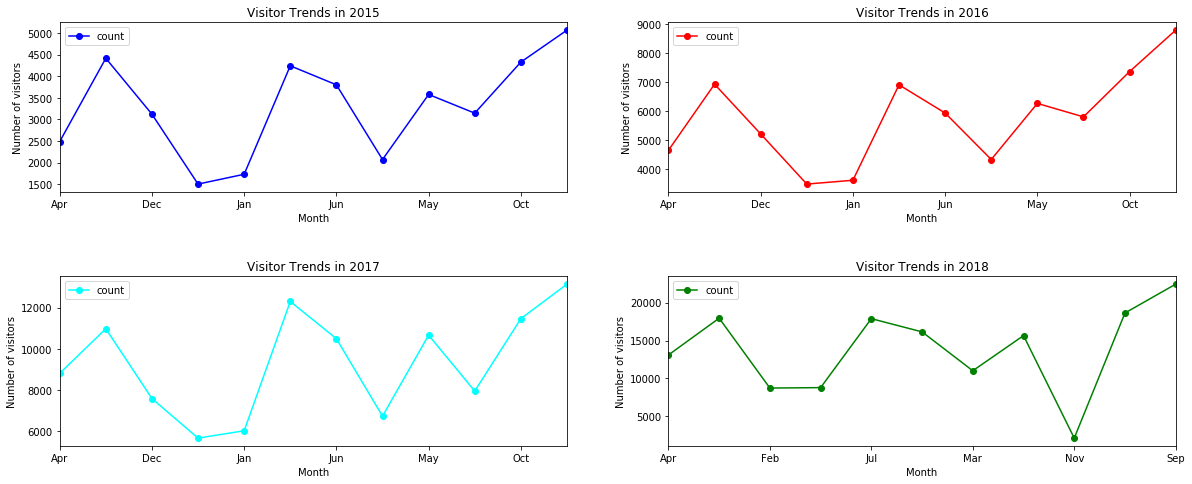

In [74]:
fig = plt.figure(figsize=(20,6))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)
review_2015.plot(kind='line', color='blue', x='month',y='count',marker='o',ax=ax0) 
ax0.set_title('Visitor Trends in 2015')
ax0.set_xlabel('Month')
ax0.set_ylabel('Number of visitors')


review_2016.plot(kind='line', color='red', x='month',y='count',marker='o',ax=ax1) 
ax1.set_title('Visitor Trends in 2016')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of visitors')


review_2017.plot(kind='line', color='cyan', x='month',y='count',marker='o',ax=ax2) 
ax2.set_title('Visitor Trends in 2017')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of visitors')


review_2018.plot(kind='line', color='green', x='month',y='count',marker='o',ax=ax3) 
ax3.set_title('Visitor Trends in 2018')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of visitors')

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5)
plt.show()